In [49]:
from matplotlib import pyplot as plt
import pandas as pd
from config import api_key
import requests
import json
import datetime as date

In [50]:
tickers = ['AAPL', 'GOOG', 'AMZN']
dfs = []
for annual in tickers:
    annual_url = f"https://financialmodelingprep.com/api/v3/income-statement/{annual}?limit=11&apikey={api_key}"
    response = requests.get(annual_url).json()
    data = pd.json_normalize(response)
    data["tickers"] = annual
    dfs.append(data)


In [51]:
merge_df = pd.concat(dfs)

merge_df

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,...,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink,tickers
0,2022-09-24,AAPL,USD,0000320193,2022-10-28,2022-10-27 18:01:14,2022,FY,394328000000,223546000000,...,19300000000,99803000000,0.253096,6.150000,6.110000,16215963000,16325819000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,AAPL
1,2021-09-25,AAPL,USD,0000320193,2021-10-29,2021-10-28 18:04:28,2021,FY,365817000000,212981000000,...,14527000000,94680000000,0.258818,5.670000,5.610000,16701272000,16864919000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,AAPL
2,2020-09-26,AAPL,USD,0000320193,2020-10-30,2020-10-29 18:06:25,2020,FY,274515000000,169559000000,...,9680000000,57411000000,0.209136,3.310000,3.280000,17352119000,17528214000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,AAPL
3,2019-09-28,AAPL,USD,0000320193,2019-10-31,2019-10-30 18:12:36,2019,FY,260174000000,161782000000,...,10481000000,55256000000,0.212381,2.992500,2.972500,18471336000,18595652000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,AAPL
4,2018-09-29,AAPL,USD,0000320193,2018-11-05,2018-11-05 08:01:40,2018,FY,265595000000,163756000000,...,13372000000,59531000000,0.224142,3.002500,2.977500,19821508000,20000436000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,AAPL
5,2017-09-30,AAPL,USD,0000320193,2017-11-03,2017-11-03 08:01:37,2017,FY,229234000000,141048000000,...,15738000000,48351000000,0.210924,2.317500,2.302500,20868968000,21006768000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,AAPL
6,2016-09-24,AAPL,USD,0000320193,2016-10-26,2016-10-26 16:42:16,2016,FY,215639000000,131376000000,...,15685000000,45687000000,0.211868,2.087500,2.077500,21883280000,22001124000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,AAPL
7,2015-09-26,AAPL,USD,0000320193,2015-10-28,2015-10-28 16:31:09,2015,FY,233715000000,140089000000,...,19121000000,53394000000,0.228458,2.320000,2.305000,23013684000,23172276000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,AAPL
8,2014-09-27,AAPL,USD,0000320193,2014-10-27,2014-10-27 17:11:55,2014,FY,182795000000,112258000000,...,13973000000,39510000000,0.216144,1.622500,1.612500,24342288000,24490652000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,AAPL
9,2013-09-28,AAPL,USD,0000320193,2013-10-30,2013-10-29 20:38:28,2013,FY,170910000000,106606000000,...,13118000000,37037000000,0.216705,1.429643,1.419643,25909268000,26086536000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,AAPL


In [52]:
#Delete Unwanted columns
del_df = merge_df.drop(['reportedCurrency', 'cik', 'acceptedDate', 'costOfRevenue', 'grossProfitRatio', 'researchAndDevelopmentExpenses', 'generalAndAdministrativeExpenses', 'ebitdaratio', 'operatingIncome', 'operatingIncomeRatio', 'totalOtherIncomeExpensesNet', 'incomeBeforeTax', 'incomeTaxExpense', 'netIncomeRatio', 'epsdiluted', 'weightedAverageShsOutDil', 'link', 'finalLink', 'sellingAndMarketingExpenses', 'sellingGeneralAndAdministrativeExpenses', 'otherExpenses', 'costAndExpenses', 'interestIncome', 'interestExpense', 'depreciationAndAmortization', 'ebitda', 'incomeBeforeTaxRatio', 'operatingExpenses', 'tickers'], axis=1)

del_df

,date,symbol,fillingDate,calendarYear,period,revenue,grossProfit,netIncome,eps,weightedAverageShsOut
0,2022-09-24,AAPL,2022-10-28,2022,FY,394328000000,170782000000,99803000000,6.150000,16215963000
1,2021-09-25,AAPL,2021-10-29,2021,FY,365817000000,152836000000,94680000000,5.670000,16701272000
2,2020-09-26,AAPL,2020-10-30,2020,FY,274515000000,104956000000,57411000000,3.310000,17352119000
3,2019-09-28,AAPL,2019-10-31,2019,FY,260174000000,98392000000,55256000000,2.992500,18471336000
4,2018-09-29,AAPL,2018-11-05,2018,FY,265595000000,101839000000,59531000000,3.002500,19821508000
5,2017-09-30,AAPL,2017-11-03,2017,FY,229234000000,88186000000,48351000000,2.317500,20868968000
6,2016-09-24,AAPL,2016-10-26,2016,FY,215639000000,84263000000,45687000000,2.087500,21883280000
7,2015-09-26,AAPL,2015-10-28,2015,FY,233715000000,93626000000,53394000000,2.320000,23013684000
8,2014-09-27,AAPL,2014-10-27,2014,FY,182795000000,70537000000,39510000000,1.622500,24342288000
9,2013-09-28,AAPL,2013-10-30,2013,FY,170910000000,64304000000,37037000000,1.429643,25909268000


In [53]:
del_df.sort_values('calendarYear', inplace=True)

In [54]:
del_df["revenue(B)"] = del_df['revenue'] / 10e9
del_df["netIncome(B)"] = del_df['netIncome'] / 10e9

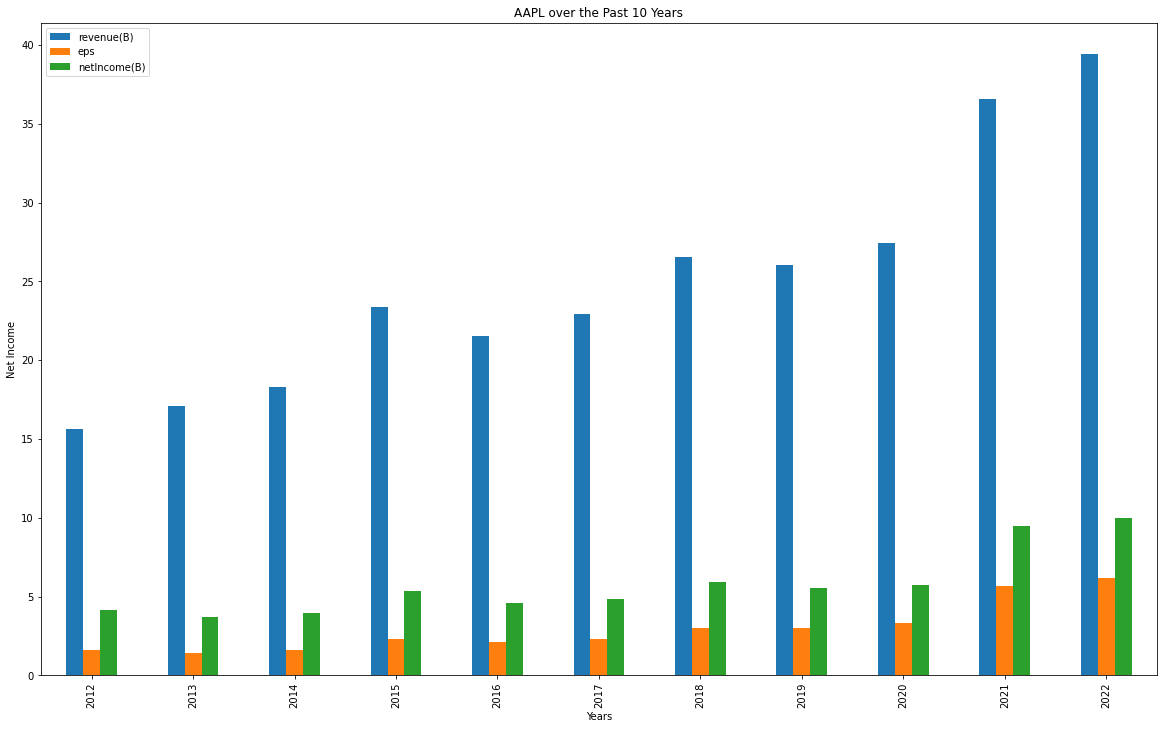

In [55]:
del_df.loc[del_df["symbol"] == "AAPL"].plot("calendarYear", ['revenue(B)', 'eps', 'netIncome(B)'], kind= 'bar', figsize=(20,12))
plt.title("AAPL over the Past 10 Years")
plt.xlabel("Years")
plt.ylabel("Net Income")
plt.show()


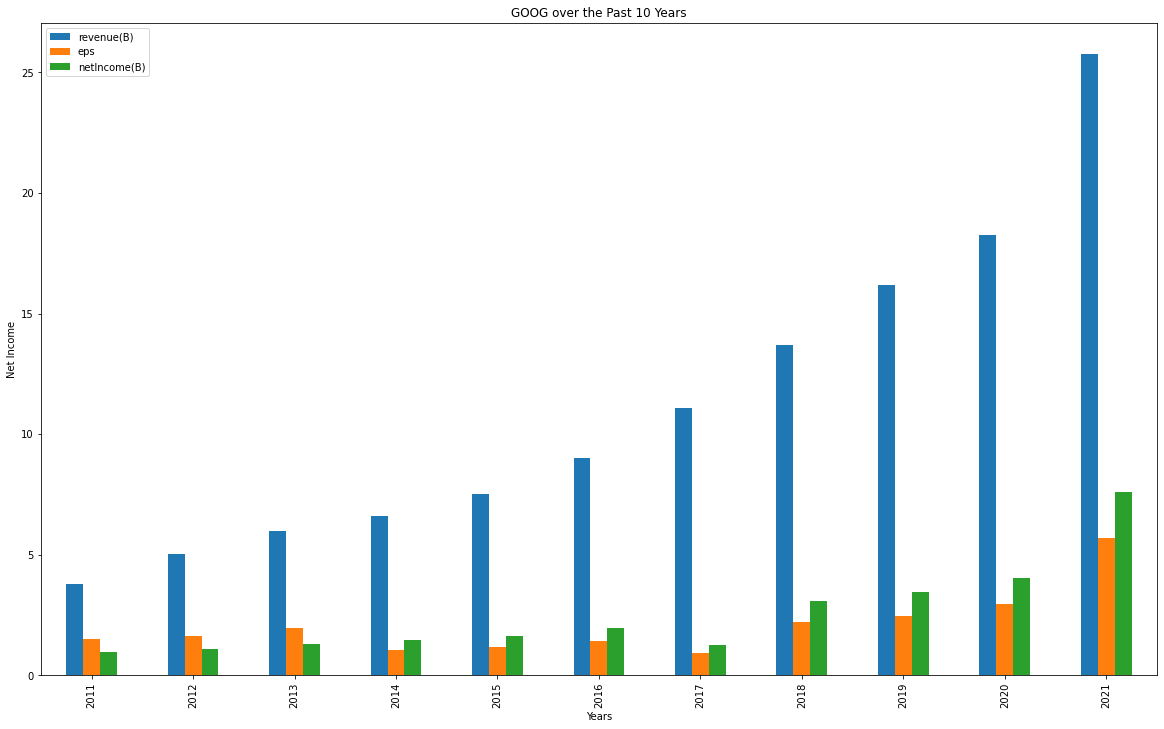

In [56]:
del_df.loc[del_df["symbol"] == "GOOG"].plot("calendarYear", ['revenue(B)', 'eps', 'netIncome(B)'], kind= 'bar', figsize=(20,12))
plt.title("GOOG over the Past 10 Years")
plt.xlabel("Years")
plt.ylabel("Net Income")
plt.show()

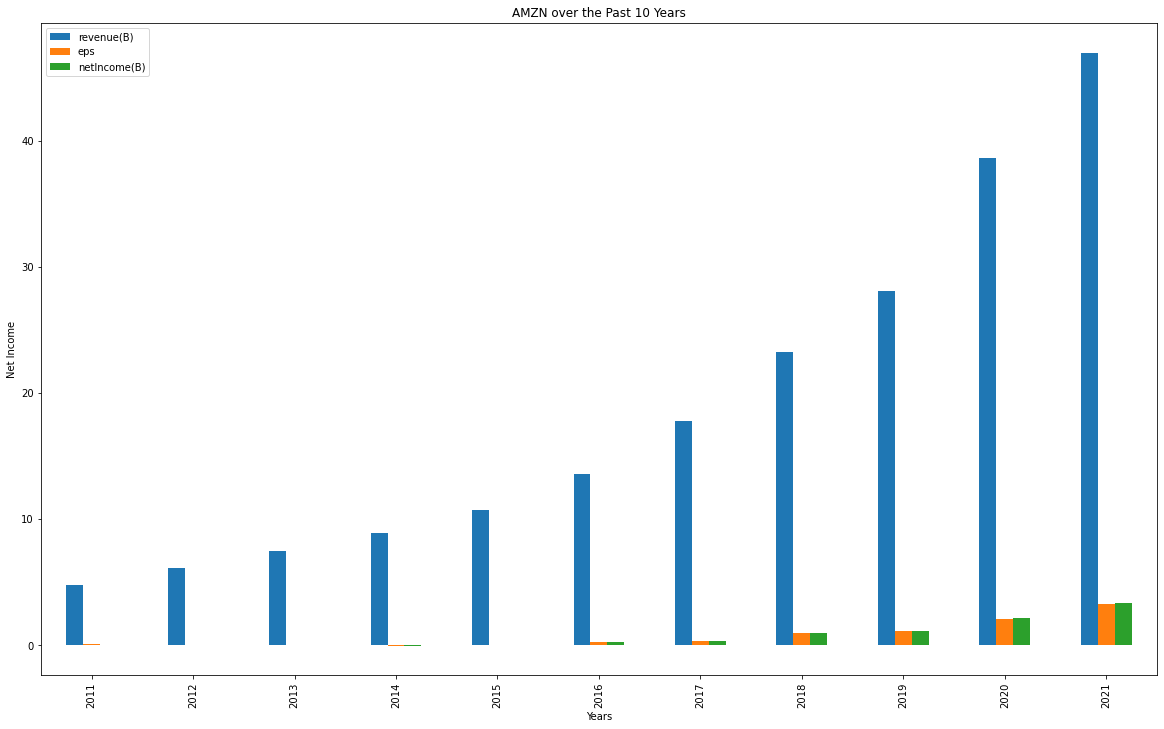

In [57]:
del_df.loc[del_df["symbol"] == "AMZN"].plot("calendarYear", ['revenue(B)', 'eps', 'netIncome(B)'], kind= 'bar', figsize=(20,12))
plt.title("AMZN over the Past 10 Years")
plt.xlabel("Years")
plt.ylabel("Net Income")
plt.show()

In [58]:
#Get Quarterly Statements
tickers1 = ['AAPL', 'GOOG', 'AMZN']
dfs1 = []
for quarter in tickers1:
    quarter_url = f"https://financialmodelingprep.com/api/v3/income-statement/{quarter}?period=quarter&limit=44&apikey={api_key}"
    q_response = requests.get(quarter_url).json()
    data1 = pd.json_normalize(q_response)
    data1["tickers1"] = quarter
    dfs1.append(data1)

In [59]:
combo_df = pd.concat(dfs1)
combo_df

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,...,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink,tickers1
0,2022-09-24,AAPL,USD,0000320193,2022-10-28,2022-10-27 18:01:14,2022,Q4,90146000000,52051000000,...,3936000000,2.072100e+10,0.229860,1.290000,1.290000,16030382000,16118465000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,AAPL
1,2022-06-25,AAPL,USD,0000320193,2022-07-29,2022-07-28 18:06:56,2022,Q3,82959000000,47074000000,...,3624000000,1.944200e+10,0.234357,1.200000,1.200000,16162945000,16262203000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,AAPL
2,2022-03-26,AAPL,USD,0000320193,2022-04-29,2022-04-28 18:03:58,2022,Q2,97278000000,54719000000,...,5129000000,2.501000e+10,0.257098,1.530000,1.510000,16391724000,16519291000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,AAPL
3,2021-12-25,AAPL,USD,0000320193,2022-01-28,2022-01-27 18:00:58,2022,Q1,123945000000,69702000000,...,6611000000,3.463000e+10,0.279398,2.110000,2.100000,16391724000,16519291000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,AAPL
4,2021-09-25,AAPL,USD,0000320193,2021-10-29,2021-10-28 18:04:28,2021,Q4,83360000000,48186000000,...,2697000000,2.055100e+10,0.246533,1.250000,1.240000,16487121000,16635097000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,2012-12-31,AMZN,USD,0001018724,2013-01-30,2013-01-29 19:13:32,2012,Q4,21268000000,19740000000,...,194000000,9.800000e+07,0.004608,0.010500,0.010500,9080000000,9220000000,https://www.sec.gov/Archives/edgar/data/101872...,https://www.sec.gov/Archives/edgar/data/101872...,AMZN
40,2012-09-30,AMZN,USD,0001018724,2012-10-26,2012-10-25 19:35:25,2012,Q3,13806000000,10319000000,...,83000000,-2.740000e+08,-0.019846,-0.029783,-0.029783,9040000000,9200000000,https://www.sec.gov/Archives/edgar/data/101872...,https://www.sec.gov/Archives/edgar/data/101872...,AMZN
41,2012-06-30,AMZN,USD,0001018724,2012-07-27,2012-07-26 20:02:00,2012,Q2,12834000000,9488000000,...,109000000,7.000000e+06,0.000545,0.000764,0.000764,9020000000,9160000000,https://www.sec.gov/Archives/edgar/data/101872...,https://www.sec.gov/Archives/edgar/data/101872...,AMZN
42,2012-03-31,AMZN,USD,0001018724,2012-04-27,2012-04-26 21:25:46,2012,Q1,13185000000,10027000000,...,43000000,1.300000e+08,0.009860,0.014130,0.014130,9060000000,9200000000,https://www.sec.gov/Archives/edgar/data/101872...,https://www.sec.gov/Archives/edgar/data/101872...,AMZN


In [60]:
clean_df = combo_df.drop(['reportedCurrency', 'cik', 'acceptedDate', 'costOfRevenue', 'grossProfitRatio', 'researchAndDevelopmentExpenses', 'generalAndAdministrativeExpenses', 'ebitdaratio', 'operatingIncome', 'operatingIncomeRatio', 'totalOtherIncomeExpensesNet', 'incomeBeforeTax', 'incomeTaxExpense', 'netIncomeRatio', 'epsdiluted', 'weightedAverageShsOutDil', 'link', 'finalLink', 'sellingAndMarketingExpenses', 'sellingGeneralAndAdministrativeExpenses', 'otherExpenses', 'costAndExpenses', 'interestIncome', 'interestExpense', 'depreciationAndAmortization', 'ebitda', 'incomeBeforeTaxRatio', 'operatingExpenses', 'tickers1'], axis=1)
clean_df

,date,symbol,fillingDate,calendarYear,period,revenue,grossProfit,netIncome,eps,weightedAverageShsOut
0,2022-09-24,AAPL,2022-10-28,2022,Q4,90146000000,38095000000,2.072100e+10,1.290000,16030382000
1,2022-06-25,AAPL,2022-07-29,2022,Q3,82959000000,35885000000,1.944200e+10,1.200000,16162945000
2,2022-03-26,AAPL,2022-04-29,2022,Q2,97278000000,42559000000,2.501000e+10,1.530000,16391724000
3,2021-12-25,AAPL,2022-01-28,2022,Q1,123945000000,54243000000,3.463000e+10,2.110000,16391724000
4,2021-09-25,AAPL,2021-10-29,2021,Q4,83360000000,35174000000,2.055100e+10,1.250000,16487121000
...,...,...,...,...,...,...,...,...,...,...
39,2012-12-31,AMZN,2013-01-30,2012,Q4,21268000000,1528000000,9.800000e+07,0.010500,9080000000
40,2012-09-30,AMZN,2012-10-26,2012,Q3,13806000000,3487000000,-2.740000e+08,-0.029783,9040000000
41,2012-06-30,AMZN,2012-07-27,2012,Q2,12834000000,3346000000,7.000000e+06,0.000764,9020000000
42,2012-03-31,AMZN,2012-04-27,2012,Q1,13185000000,3158000000,1.300000e+08,0.014130,9060000000


In [61]:
clean_df.sort_values('calendarYear', inplace=True)

In [62]:
clean_df["revenue(B)"] = clean_df['revenue'] / 10e9
clean_df["netIncome(B)"] = clean_df['netIncome'] / 10e9

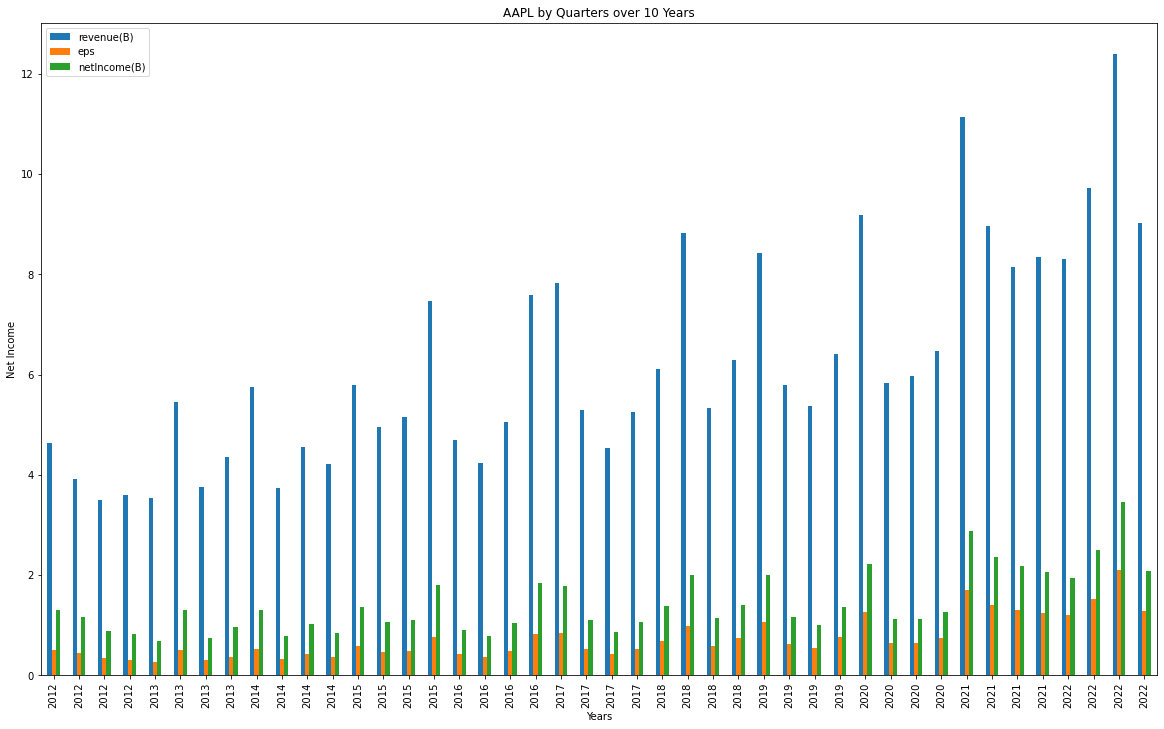

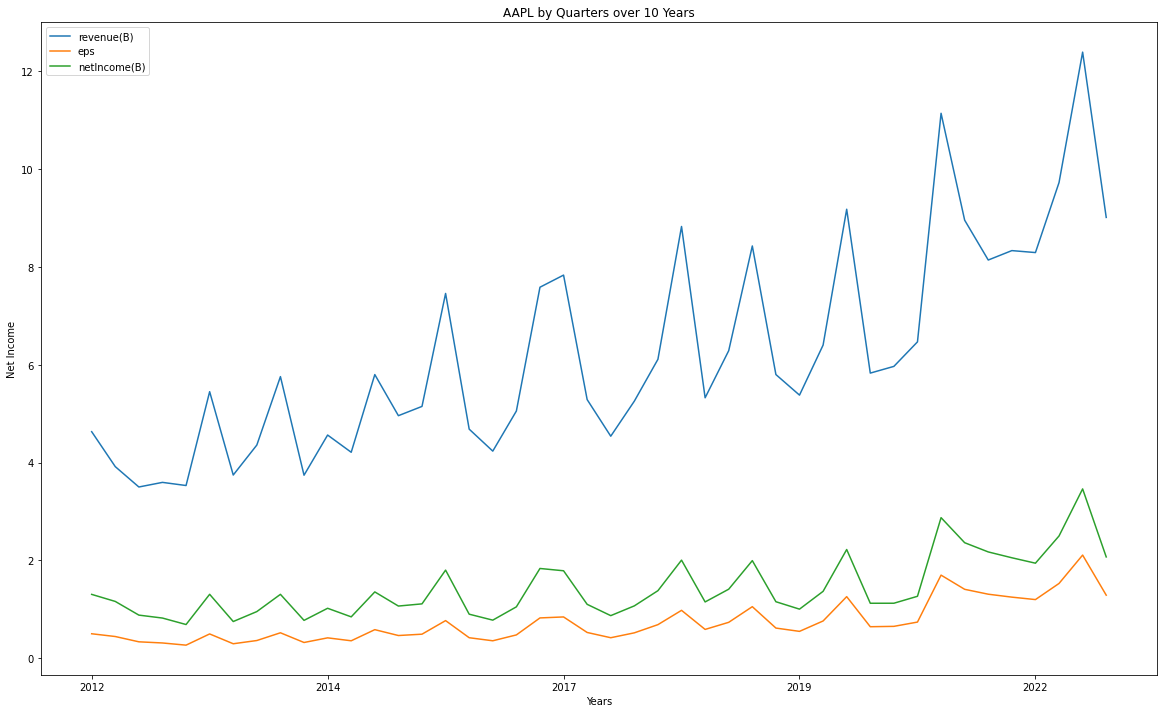

In [63]:
clean_df.loc[clean_df["symbol"] == "AAPL"].plot("calendarYear", ['revenue(B)', 'eps', 'netIncome(B)'], kind= 'bar', figsize=(20,12))
plt.title("AAPL by Quarters over 10 Years")
plt.xlabel("Years")
plt.ylabel("Net Income")
clean_df.loc[clean_df["symbol"] == "AAPL"].plot("calendarYear", ['revenue(B)', 'eps', 'netIncome(B)'], kind= 'line', figsize=(20,12))
plt.title("AAPL by Quarters over 10 Years")
plt.xlabel("Years")
plt.ylabel("Net Income")
plt.show()

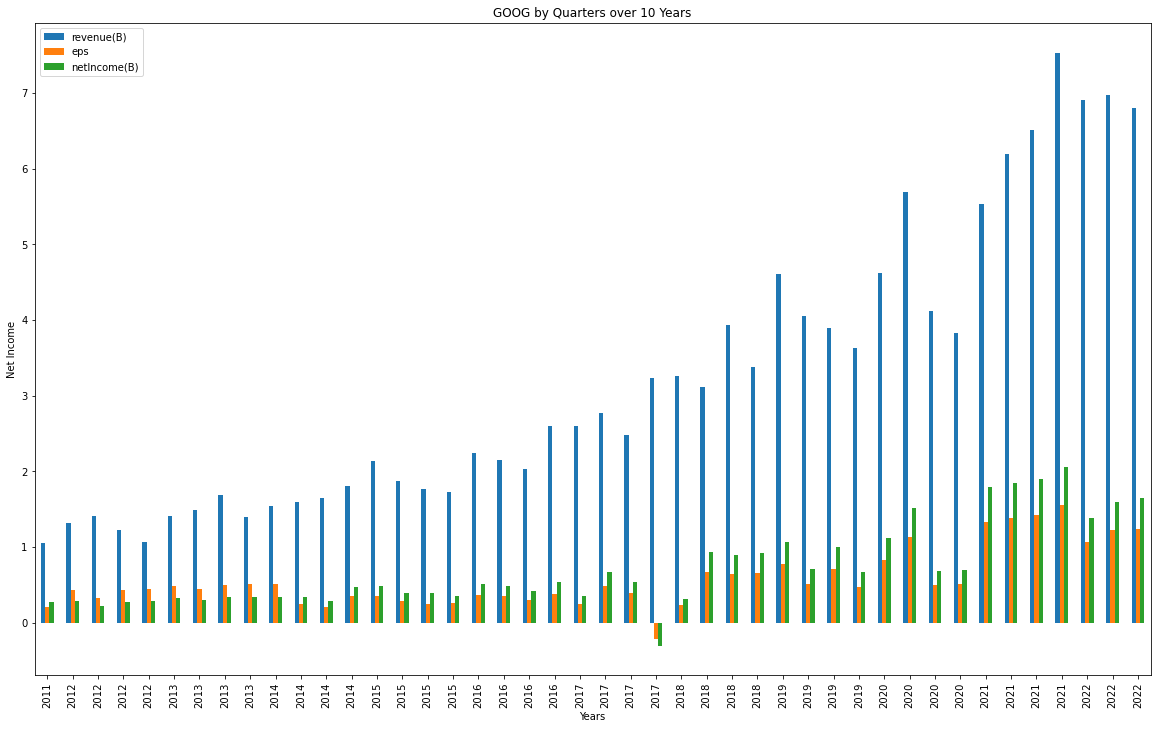

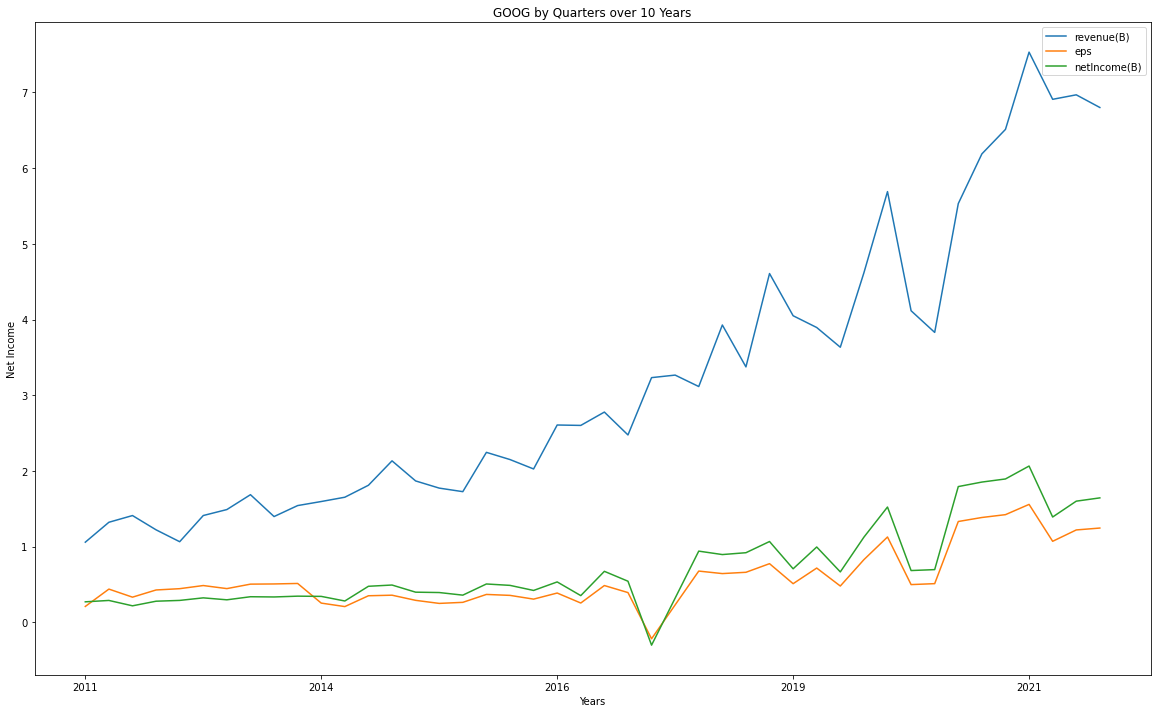

In [65]:
clean_df.loc[clean_df["symbol"] == "GOOG"].plot("calendarYear", ['revenue(B)', 'eps', 'netIncome(B)'], kind= 'bar', figsize=(20,12))
plt.title("GOOG by Quarters over 10 Years")
plt.xlabel("Years")
plt.ylabel("Net Income")
plt.show()
clean_df.loc[clean_df["symbol"] == "GOOG"].plot("calendarYear", ['revenue(B)', 'eps', 'netIncome(B)'], kind= 'line', figsize=(20,12))
plt.title("GOOG by Quarters over 10 Years")
plt.xlabel("Years")
plt.ylabel("Net Income")
plt.show()

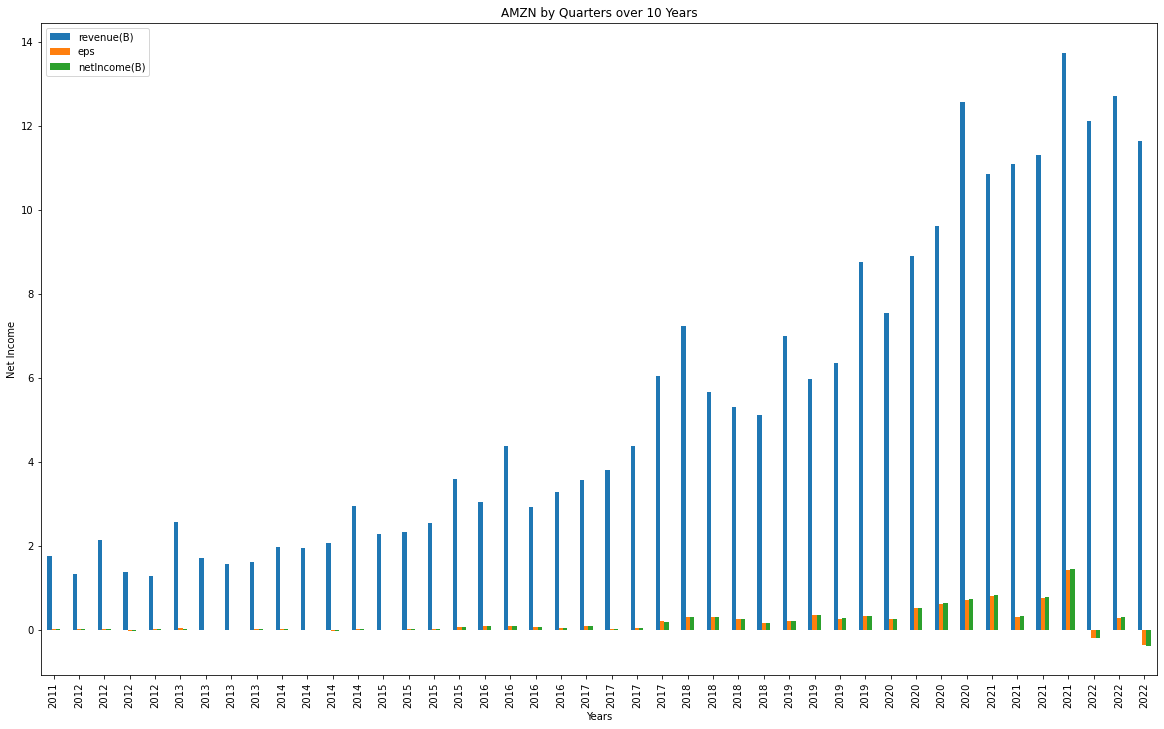

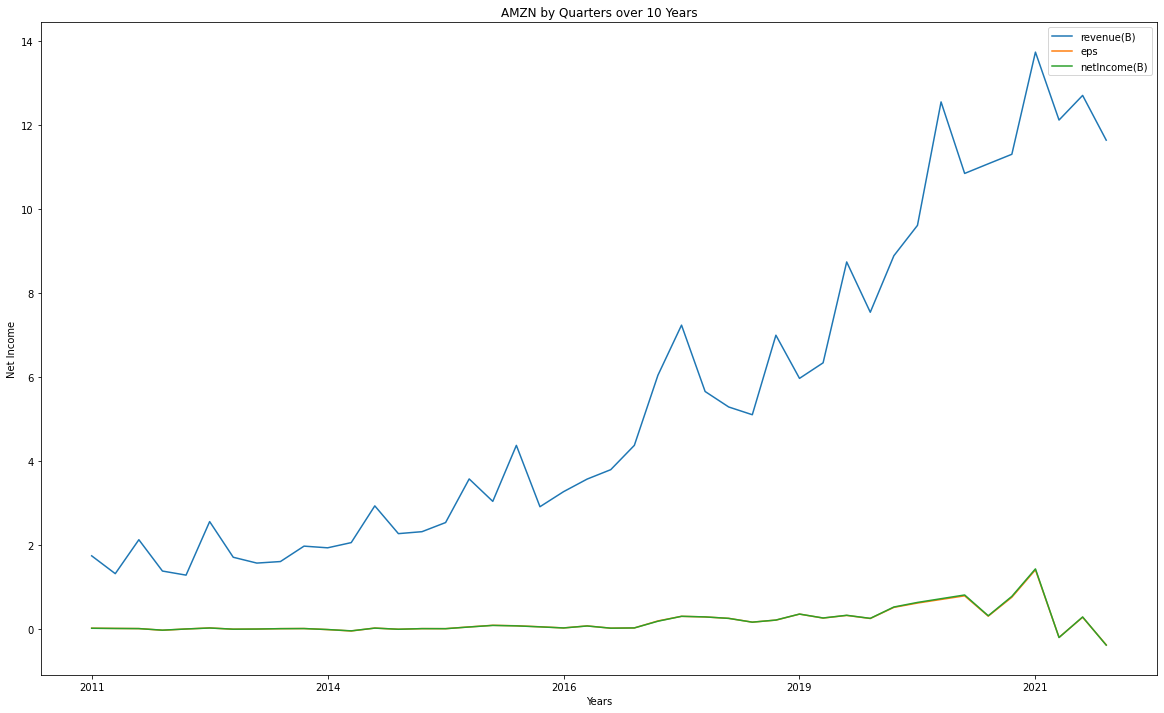

In [67]:
clean_df.loc[clean_df["symbol"] == "AMZN"].plot("calendarYear", ['revenue(B)', 'eps', 'netIncome(B)'], kind= 'bar', figsize=(20,12))
plt.title("AMZN by Quarters over 10 Years")
plt.xlabel("Years")
plt.ylabel("Net Income")
plt.show()
clean_df.loc[clean_df["symbol"] == "AMZN"].plot("calendarYear", ['revenue(B)', 'eps', 'netIncome(B)'], kind= 'line', figsize=(20,12))
plt.title("AMZN by Quarters over 10 Years")
plt.xlabel("Years")
plt.ylabel("Net Income")
plt.show()

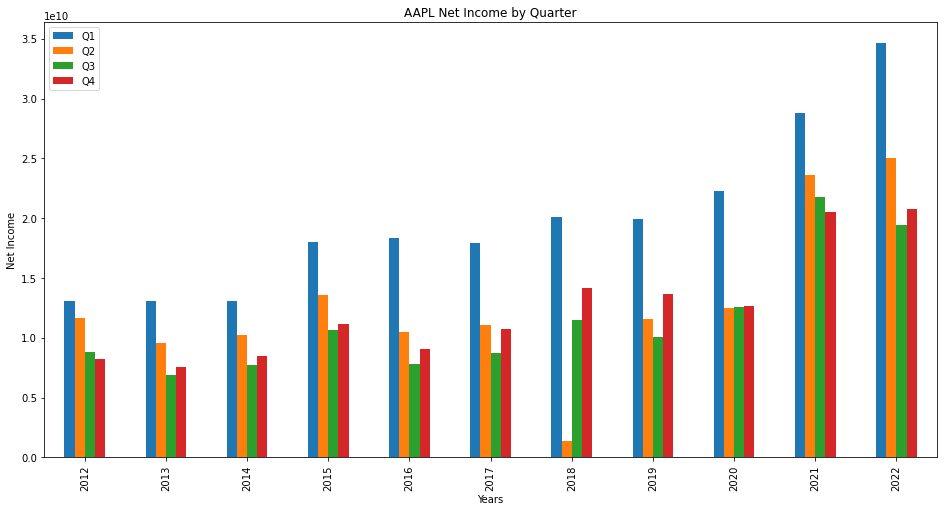

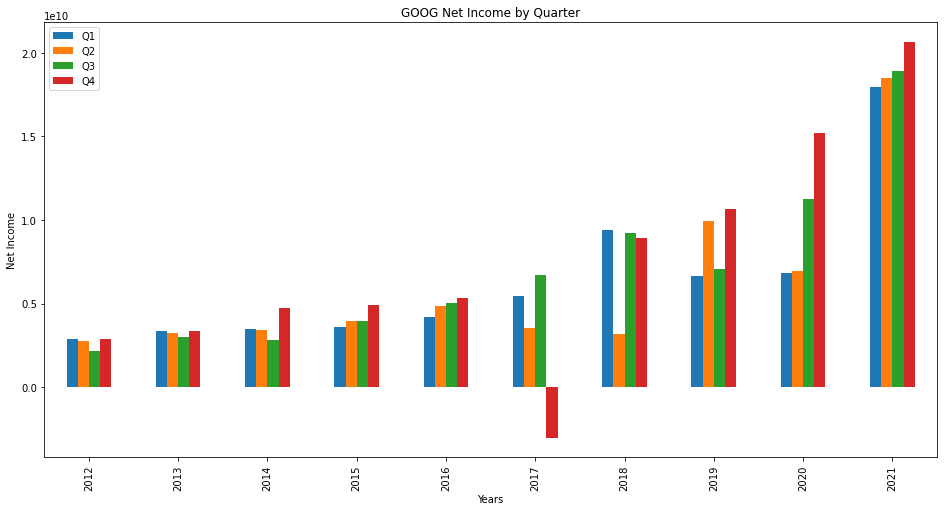

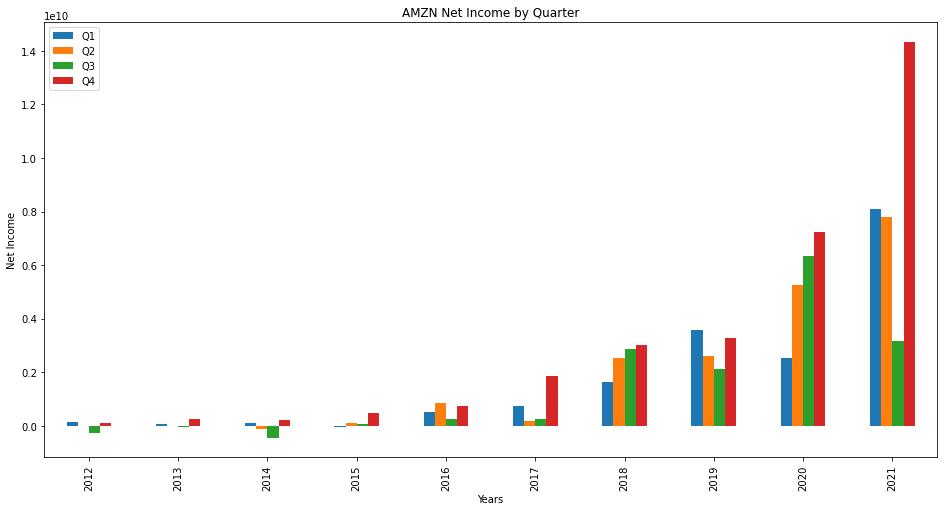

In [18]:
clean_df = pd.DataFrame({'Years': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
                   'Q1': [13064000000, 13070000000, 13072000000, 18024000000, 18361000000, 17891000000, 20065000000, 19965000000, 22236000000, 28755000000, 34630000000],
                   'Q2': [11622000000, 9547000000, 10223000000, 13569000000, 10516000000, 11029000000, 1382200000, 11561000000, 12490000000, 23630000000, 25010000000],
                   'Q3': [8822400000, 6900000000, 7748000000, 10677000000, 7796000000, 8717000000, 11519000000, 10044000000, 12530000000, 21744000000, 19442000000],
                   'Q4': [8223000000, 7512000000, 8467000000, 11124000000, 9014000000, 10714000000, 14125000000, 13686000000, 12673000000, 20551000000, 20721000000]})

#plot columns on bar chart
clean_df[['Q1', 'Q2', 'Q3', 'Q4', 'Years']].plot(x='Years', kind='bar', figsize=(16,8))
plt.title("AAPL Net Income by Quarter")
plt.xlabel("Years")
plt.ylabel("Net Income")
plt.show()

clean_df = pd.DataFrame({'Years': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
                   'Q1': [2890000000, 3346000000, 3452000000, 3586000000, 4207000000, 5426000000, 9401000000, 6657000000, 6836000000, 17930000000],
                   'Q2': [2785000000, 3228000000, 3422000000, 3931000000, 4877000000, 3524000000, 3195000000, 9947000000, 6959000000, 18525000000],
                   'Q3': [2176000000, 2970000000, 2813000000, 3979000000, 5061000000, 6732000000, 9192000000, 7068000000, 11247000000, 18936000000],
                   'Q4': [2886000000, 3376000000, 4757000000, 4923000000, 5333000000, -3020000000, 8948000000, 10671000000, 15227000000, 20642000000]})

#plot columns on bar chart
clean_df[['Q1', 'Q2', 'Q3', 'Q4', 'Years']].plot(x='Years', kind='bar', figsize=(16,8))
plt.title("GOOG Net Income by Quarter")
plt.xlabel("Years")
plt.ylabel("Net Income")
plt.show()

clean_df = pd.DataFrame({'Years': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
                   'Q1': [130000000, 82000000, 108000000, -57000000, 513000000, 724000000, 1629000000, 3561000000, 2535000000, 8107000000],
                   'Q2': [7000000, -7000000, -126000000, 92000000, 857000000, 197000000, 2534000000, 2625000000, 5243000000, 7778000000],
                   'Q3': [-274000000, -41000000, -437000000, 79000000, 252000000, 256000000, 2883000000, 2134000000, 6331000000, 3156000000],
                   'Q4': [98000000, 240000000, 214000000, 482000000, 749000000, 1857000000, 3027000000, 3268000000, 7222200000, 14323000000]})

#plot columns on bar chart
clean_df[['Q1', 'Q2', 'Q3', 'Q4', 'Years']].plot(x='Years', kind='bar', figsize=(16,8))
plt.title("AMZN Net Income by Quarter")
plt.xlabel("Years")
plt.ylabel("Net Income")
plt.show()

In [19]:
#Get Statement Balance for Cash on Hand Info & create another loop
tickers2 = ['AAPL', 'GOOG', 'AMZN']
dfs2 = []


for cash in tickers2:
    cash_url = f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{cash}?apikey={api_key}&limit=11"
    c_response = requests.get(cash_url).json()
    data2 = pd.json_normalize(c_response)
    data2["tickers2"] = cash
    data2 = data2[["date", "symbol", "fillingDate", "calendarYear", "period", "cashAndCashEquivalents", "shortTermDebt", "longTermDebt"]]
    dfs2.append(data2)

In [20]:
merge2_df = pd.concat(dfs2)
merge2_df

,date,symbol,fillingDate,calendarYear,period,cashAndCashEquivalents,shortTermDebt,longTermDebt
0,2022-09-24,AAPL,2022-10-28,2022,FY,23646000000,2.111000e+10,9.895900e+10
1,2021-09-25,AAPL,2021-10-29,2021,FY,34940000000,1.561300e+10,1.091060e+11
2,2020-09-26,AAPL,2020-10-30,2020,FY,38016000000,1.376900e+10,9.866700e+10
3,2019-09-28,AAPL,2019-10-31,2019,FY,48844000000,1.624000e+10,9.180700e+10
4,2018-09-29,AAPL,2018-11-05,2018,FY,25913000000,2.074800e+10,9.373500e+10
5,2017-09-30,AAPL,2017-11-03,2017,FY,20289000000,1.847300e+10,9.720700e+10
6,2016-09-24,AAPL,2016-10-26,2016,FY,20484000000,1.160500e+10,7.542700e+10
7,2015-09-26,AAPL,2015-10-28,2015,FY,21120000000,1.099900e+10,5.346300e+10
8,2014-09-27,AAPL,2014-10-27,2014,FY,13844000000,6.308000e+09,2.898700e+10
9,2013-09-28,AAPL,2013-10-30,2013,FY,14259000000,0.000000e+00,1.696000e+10


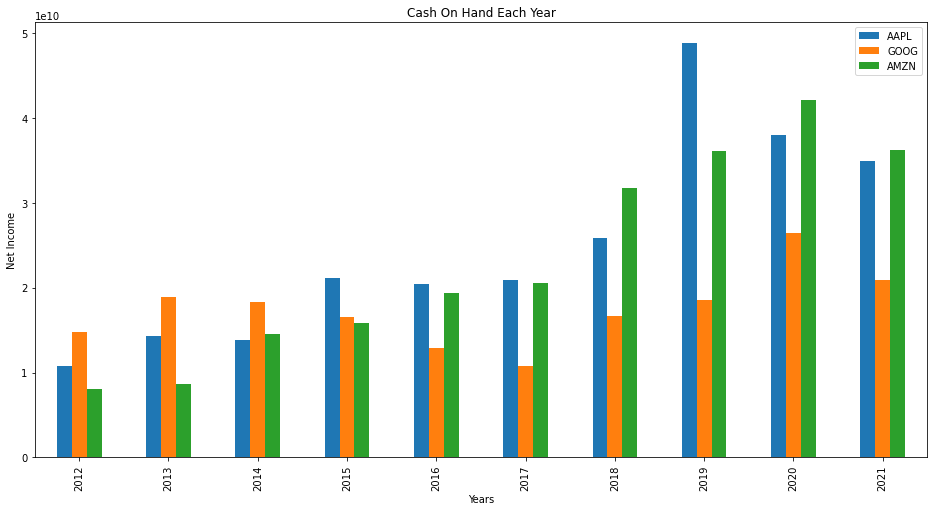

In [21]:
merge2_df = pd.DataFrame({'Years': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
                   'AAPL': [10746000000, 14259000000, 13844000000, 21120000000, 20484000000, 20898000000, 25913000000, 48844000000, 38016000000, 34940000000],
                   'GOOG': [14778000000, 18898000000, 18347000000, 16549000000, 12918000000, 10715000000, 16701000000, 18498000000, 26465000000, 20945000000],
                   'AMZN': [8084000000, 8658000000, 14557000000, 15890000000, 19334000000, 20522000000, 31750000000, 36092000000, 42122000000, 36220000000]})

#plot columns on bar chart
merge2_df[['AAPL', 'GOOG', 'AMZN', 'Years']].plot(x='Years', kind='bar', figsize=(16, 8))
plt.title("Cash On Hand Each Year")
plt.xlabel("Years")
plt.ylabel("Net Income")
plt.show()